In [1]:
#Importing the nexessary libraries
import pandas as pd
import numpy as np

In [2]:
#Reading the file
df = pd.read_csv('Species_Data.csv')

In [3]:
df.head()

,entrez,symbol,S1,S2,S3,S4,S5,S6,S7,S8,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,14679,Gnai3,7.985282,8.654102,7.851483,9.427284,8.484089,8.430295,8.785142,8.234337,...,8.988352,8.861340,8.698631,8.214616,8.933242,8.523217,8.263034,8.442125,8.683792,8.148272
1,54192,Pbsn,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
2,12544,Cdc45,5.342660,5.621617,5.894139,5.530200,5.953490,5.800456,5.750067,5.763297,...,5.066617,5.199745,5.207598,5.158604,4.773268,5.028918,5.392552,5.014560,5.372466,5.033642
3,107815,Scml2,4.720995,5.129361,5.017464,5.126493,5.137191,5.081444,4.804693,4.402777,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
4,11818,Apoh,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777


In [4]:
#Dropping the names and the id of the genes
df2 = df.drop('entrez',1)
df2 = df2.drop('symbol',1)

In [5]:
df2.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,7.985282,8.654102,7.851483,9.427284,8.484089,8.430295,8.785142,8.234337,8.608668,8.753909,...,8.988352,8.861340,8.698631,8.214616,8.933242,8.523217,8.263034,8.442125,8.683792,8.148272
1,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
2,5.342660,5.621617,5.894139,5.530200,5.953490,5.800456,5.750067,5.763297,6.190152,5.676501,...,5.066617,5.199745,5.207598,5.158604,4.773268,5.028918,5.392552,5.014560,5.372466,5.033642
3,4.720995,5.129361,5.017464,5.126493,5.137191,5.081444,4.804693,4.402777,5.012705,4.909656,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
4,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777


Now, in order to find the similar species based on the gene structures (22,000) in number, there is a need to use Unsupervised Machine Learning algorithms. Firstly, I have taken the transpose of the given dataset in order to make the species as the instances and the gene markers as the features on the basis of which the similar species need to be identified.

In [8]:
#Taking the transpose
df2 = df2.T
df2

,0,1,2,3,4,5,6,7,8,9,...,22401,22402,22403,22404,22405,22406,22407,22408,22409,22410
S1,7.985282,4.402777,5.342660,4.720995,4.402777,6.996224,6.746448,11.632144,6.152779,8.335453,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.720995,4.402777,4.402777,4.402777,4.402777
S2,8.654102,4.402777,5.621617,5.129361,4.402777,7.205572,6.653430,11.641439,6.020570,8.370482,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S3,7.851483,4.402777,5.894139,5.017464,4.402777,6.938888,6.771460,11.077264,6.142056,8.692579,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S4,9.427284,4.402777,5.530200,5.126493,4.402777,7.057035,7.086915,14.050733,5.961195,8.279990,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S5,8.484089,4.402777,5.953490,5.137191,4.402777,7.621014,6.869015,13.834583,6.011059,8.713771,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S6,8.430295,4.402777,5.800456,5.081444,4.402777,7.082733,6.802230,13.951405,5.835918,8.191215,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S7,8.785142,4.402777,5.750067,4.804693,4.402777,7.056663,7.009951,13.657285,5.579534,8.904602,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S8,8.234337,4.402777,5.763297,4.402777,4.402777,6.561562,7.091785,13.957197,5.850252,8.841792,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777
S9,8.608668,4.402777,6.190152,5.012705,4.402777,6.620420,7.988129,13.917912,5.477005,8.502414,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.949115,4.402777,4.402777,4.402777,4.402777
S10,8.753909,4.402777,5.676501,4.909656,4.402777,5.614808,6.809720,13.830739,5.705998,8.785953,...,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777,4.402777


Since, the number of features in the given case has become very large as compared to the number of instances of the dataset, there is a need of feature reduction in order to find the most similar species. For the feature reduction purpose, Principle Component Analysis (PCA) algorithm has been used and out of all the 22,000 gene markers, the first 2 principle components have been identified in order to visualize the different species on a 2-D space and gather in information about the similar species. 

In [9]:
#PCA algorithm being used for the dimensionality reduction process in the given case
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df2)
transformed = pca.transform(df2)

In [10]:
#The transformed data
print transformed

[[ 59.06650815 -29.71651542]
 [ 58.20771534 -25.48705965]
 [ 59.59234102 -27.11057184]
 [ 53.19284093   0.11868817]
 [ 56.44537852   1.88392958]
 [ 53.49028445   0.22833631]
 [ 43.74469926  19.27143045]
 [ 42.80163896  19.75934528]
 [ 41.77962051  19.83043494]
 [ 10.42865235  40.15828494]
 [ 10.60625565  40.36411603]
 [ 10.28508839  38.01602971]
 [-29.87042113  36.4781884 ]
 [-28.7861694   38.98190701]
 [-29.53714691  34.04249715]
 [-35.26470831  12.93830176]
 [-34.19692748  11.58571708]
 [-34.12482248   9.94276494]
 [-33.08299544  -4.51216305]
 [-32.49109637  -4.41660703]
 [-31.82828476  -4.43645904]
 [-27.34322384 -16.96364374]
 [-28.448118   -17.88808556]
 [-28.04825677 -16.97988376]
 [-24.94814332 -20.83297447]
 [-25.3142791  -21.61005799]
 [-26.26405321 -21.14256775]
 [-16.82865517 -36.57177679]
 [-16.05884253 -37.96699104]
 [-17.20487931 -37.96461463]]


Next, the transformed features are plotted onto the graph in order to visualise if there exists some kind of clusters withtin the species.

In [18]:
colors = ['red','blue','green','yellow','black','cyan','violet','navy','slateblue','skyblue','palegreen','gold','wheat',
         'khaki','salmon','brown','tomato','purple','magenta','cadetblue','maroon','coral','orange','grey','saddlebrown',
         'cyan','teal','seagreen','plum','sienna']
names = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20',
        's21','s22','s23','s24','s25','s26','s27','s28','s29','s30']
mapping = pd.DataFrame(colors,names)

<IPython.core.display.Javascript object>


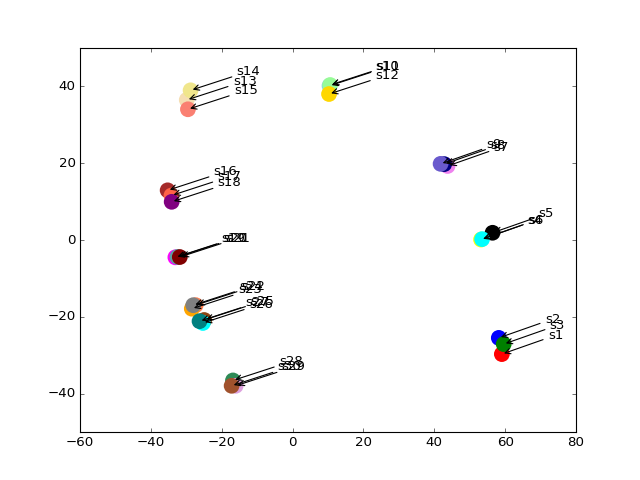

               0
s1           red
s2          blue
s3         green
s4        yellow
s5         black
s6          cyan
s7        violet
s8          navy
s9     slateblue
s10      skyblue
s11    palegreen
s12         gold
s13        wheat
s14        khaki
s15       salmon
s16        brown
s17       tomato
s18       purple
s19      magenta
s20    cadetblue
s21       maroon
s22        coral
s23       orange
s24         grey
s25  saddlebrown
s26         cyan
s27         teal
s28     seagreen
s29         plum
s30       sienna


In [30]:
#Plotting the different species on the graph
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
ax.scatter(transformed[:, 0], transformed[:, 1], linewidths=0, s=200,c=colors)
for i, txt in enumerate(names):
    ax.annotate(txt, xy=(transformed[i,0],transformed[i,1]),xytext=(transformed[i,0]+13,transformed[i,1]+4)
                ,arrowprops=dict(arrowstyle="->",facecolor='black'))
plt.show()
print mapping

# K-Means Clustering Algorithm

The first algorithm or the ML technique being used to find the set of similar species for the given case is the K-Means clustering algorithm. This algorithm aims to partition the observations into a pre-defined number of clusters. Here, I have used the elbow method to find the appropriate number of clusters for the given case in which I have looked at the cluster dispersion for different values of k. The elbow method looks at the percentage of variance explained as a function of the number of clusters. In the plot of the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information, but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

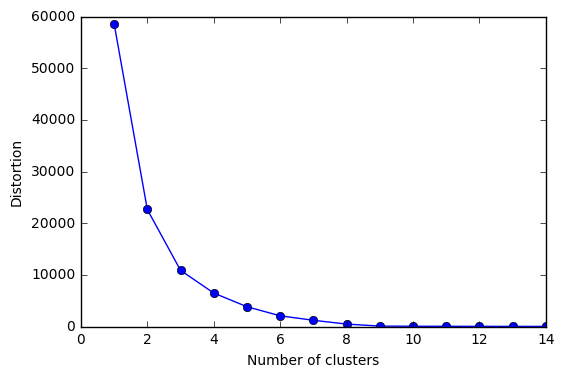

In [31]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(transformed)
    distortions.append(km.inertia_)
%matplotlib inline
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show() #the elbow graph for the k-means clustering

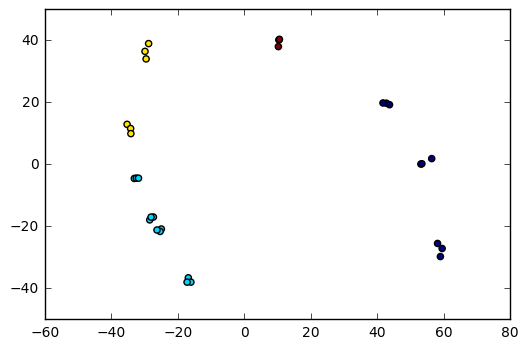

     0
s1   0
s2   0
s3   0
s4   0
s5   0
s6   0
s7   0
s8   0
s9   0
s10  3
s11  3
s12  3
s13  2
s14  2
s15  2
s16  2
s17  2
s18  2
s19  1
s20  1
s21  1
s22  1
s23  1
s24  1
s25  1
s26  1
s27  1
s28  1
s29  1
s30  1


In [46]:
#Here, the above method suggests 4 cluster solutions
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(transformed)
clusters = pd.DataFrame(labels,names)
plt.scatter(transformed[:, 0], transformed[:, 1], c=labels,cmap=cmap)
plt.legend(loc='best',scatterpoints=1)
plt.show()
print clusters

# Mean Shift Clustering
Mean Shift Clustering algorithm does not require us to specify the number of clusters which need to be formed. It is centroid based algorithm, like K-Means algorithm. The underlying idea of the Mean Shift algorithm is that there exists some probability density function from which the data is drawn, and tries to place centroids of clusters at the maxima of that density function. It aims to discover blobs in a smooth density of samples. It works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

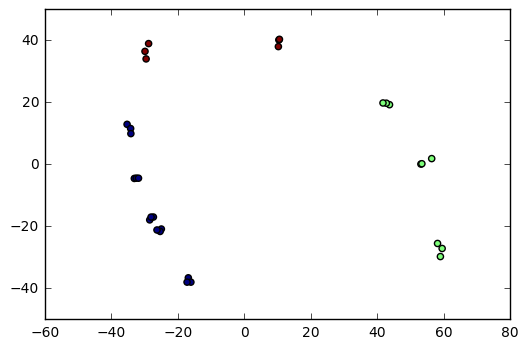

     0
s1   1
s2   1
s3   1
s4   1
s5   1
s6   1
s7   1
s8   1
s9   1
s10  2
s11  2
s12  2
s13  2
s14  2
s15  2
s16  0
s17  0
s18  0
s19  0
s20  0
s21  0
s22  0
s23  0
s24  0
s25  0
s26  0
s27  0
s28  0
s29  0
s30  0


In [62]:
from sklearn.cluster import MeanShift
ms = MeanShift()
labels = ms.fit_predict(transformed)
clusters = pd.DataFrame(labels,names)
plt.scatter(transformed[:, 0], transformed[:, 1], c=labels)
plt.show()
print clusters

# Affinity Propagation
In this algorithm also, we need not specify the number of clusters earlier as in the case of K-Means algorithm. It is a clustering algorithm based on message passing between data points. It uses a graph based approach to let points ‘vote’ on their preferred ‘exemplar’. The end result is a set of cluster ‘exemplars’ from which we derive clusters by essentially doing what K-Means does and assigning each point to the cluster of it’s nearest exemplar.

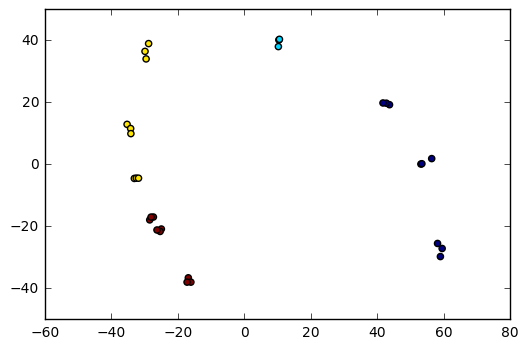

     0
s1   0
s2   0
s3   0
s4   0
s5   0
s6   0
s7   0
s8   0
s9   0
s10  1
s11  1
s12  1
s13  2
s14  2
s15  2
s16  2
s17  2
s18  2
s19  2
s20  2
s21  2
s22  3
s23  3
s24  3
s25  3
s26  3
s27  3
s28  3
s29  3
s30  3


In [63]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation()
labels = ap.fit_predict(transformed)
clusters = pd.DataFrame(labels,names)
plt.scatter(transformed[:, 0], transformed[:, 1], c=labels)
plt.show()
print clusters

The above problem in which we had to identify the similar species was a problem based on the approach of unsupervised learning. First of all, PCA algorithm was used for the dimensionality reduction process in order to visualise the data and find patterns visually through the scatter-plot. The Mean-Shift Clustering and Affinity Propagation Clustering algorithms were used to find the similar set of species without specifying the number of clusters into which the data had to be divided. In K-Means Clustering algorithm, the number of clusters had to be provided, but with the use of the elbow method, the optimal number of clusters for the species was found out.